## **Análisis Exploratorio de Datos (Práctica)**
 
**Objetivo:** Realizar un análisis exploratorio de datos en un dataset de marketing bancario.
 
**Instrucciones:**
 
**Carga del Dataset:**
 
Utilizar el dataset Bank Marketing de la UCI.
 
**Tareas:**
 
Visualizar distribuciones de las características numéricas.
 
Analizar la correlación entre las características.
 
Identificar y tratar valores atípicos.
 
**Dataset**
 
Bank marketing

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Paso 1: Cargar el dataset

# Cargar el archivo CSV con ';' como separador
df = pd.read_csv('../../data/ml/bank-full.csv', sep=';')


In [4]:
# Dimensiones
print("Dimensiones: filas, columnas")
print(df.shape)

print("5 primeros registros")
print(df.head(5))

print("5 ultimos registros")
print(df.tail(5))

Dimensiones: filas, columnas
(45211, 17)
5 primeros registros
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
5 ultimos registros
       age           job   ma

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Listado de columnas que deseas convertir a categóricas
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'month', 'poutcome', 'y']

# Convertir las columnas especificadas a tipo 'category'
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [12]:
# Opcional: Convertir a tipos de datos más pequeños si el rango de valores es pequeño
df['age'] = df['age'].astype('int32')
df['balance'] = df['balance'].astype('int32')
df['day'] = df['day'].astype('int8')  # Los días suelen estar entre 1 y 31
df['duration'] = df['duration'].astype('int32')
df['campaign'] = df['campaign'].astype('int8')
df['pdays'] = df['pdays'].astype('int16')
df['previous'] = df['previous'].astype('int8')

# Verificar la estructura final del DataFrame
print(df.dtypes)

age             int32
job          category
marital      category
education    category
default      category
balance         int32
housing      category
loan         category
contact      category
day              int8
month        category
duration        int32
campaign         int8
pdays           int16
previous         int8
poutcome     category
y            category
dtype: object


In [13]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [17]:
# Contar valores nulos en cada columna
nulos_por_columna1 = df.isnull().sum()
# Mostrar el resultado
print(nulos_por_columna1)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int32   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int32   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int8    
 10  month      45211 non-null  category
 11  duration   45211 non-null  int32   
 12  campaign   45211 non-null  int8    
 13  pdays      45211 non-null  int16   
 14  previous   45211 non-null  int8    
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int16(1), int32(3), int8(3)
memory usage: 1.2 MB


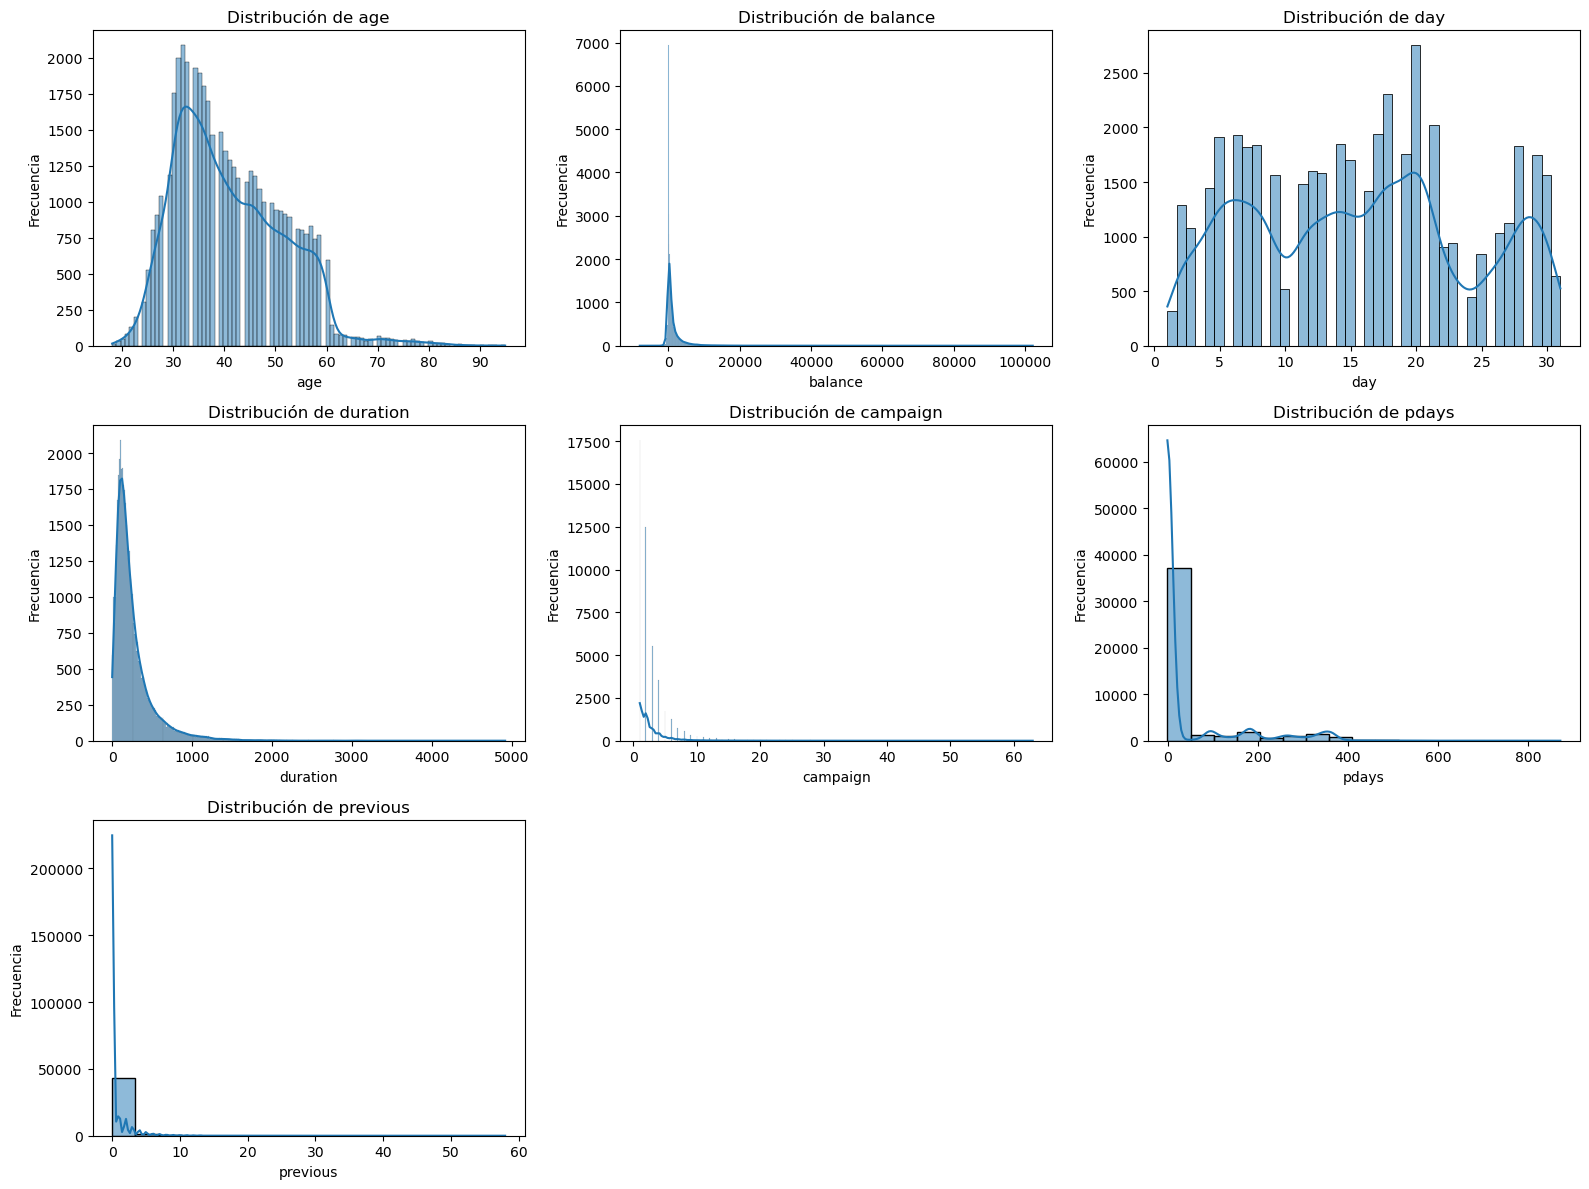

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar sólo las columnas numéricas
numerical_cols = df.select_dtypes(include=['int32', 'int16', 'int8', 'float32', 'float64']).columns

# Configurar el tamaño de los gráficos
plt.figure(figsize=(16, 12))

# Crear histogramas para cada columna numérica
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)               # Crear una cuadrícula de gráficos 3x3 (ajusta según el número de columnas)
    sns.histplot(df[col], kde=True)    # Gráfico de histograma con línea de densidad (KDE)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()                     # Ajustar la disposición para evitar superposiciones
plt.show()


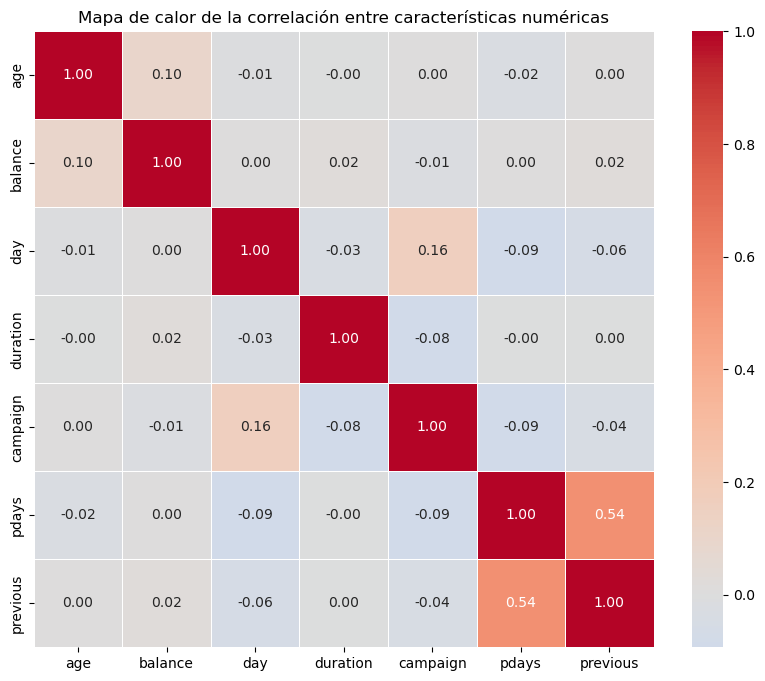

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar sólo las columnas numéricas
numerical_cols = df.select_dtypes(include=['int32', 'int16', 'int8', 'float32', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_cols.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de la correlación entre características numéricas")
plt.show()


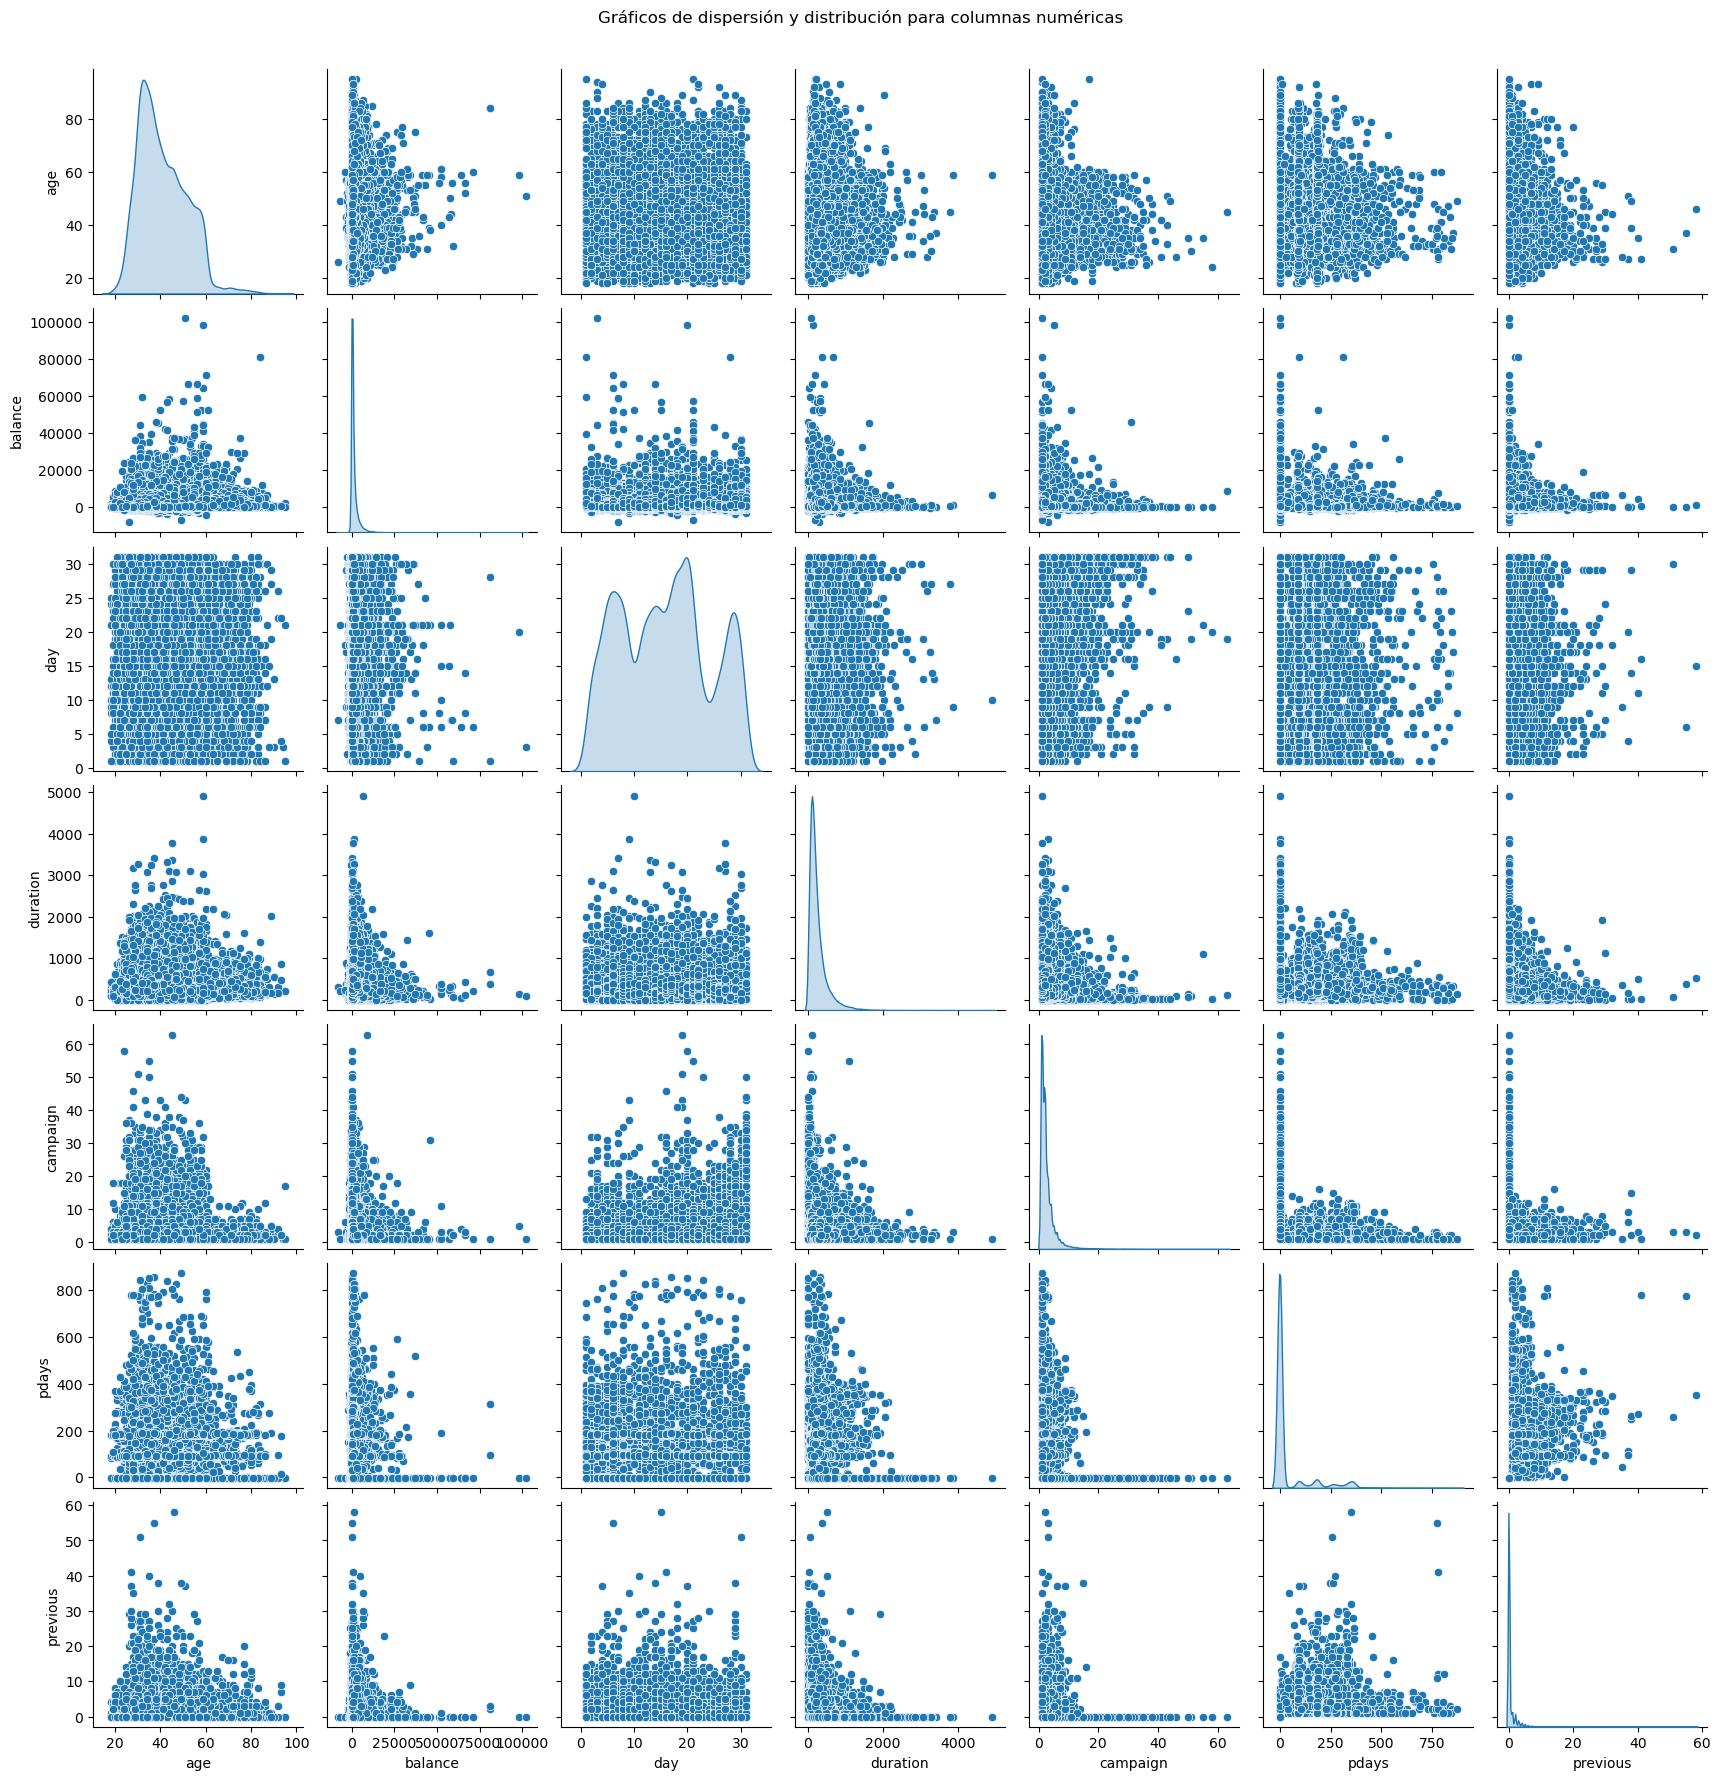

Correlación de Pearson entre age y balance: 0.10
Correlación de Pearson entre age y day: -0.01
Correlación de Pearson entre age y duration: -0.00
Correlación de Pearson entre age y campaign: 0.00
Correlación de Pearson entre age y pdays: -0.02
Correlación de Pearson entre age y previous: 0.00
Correlación de Pearson entre balance y age: 0.10
Correlación de Pearson entre balance y day: 0.00
Correlación de Pearson entre balance y duration: 0.02
Correlación de Pearson entre balance y campaign: -0.01
Correlación de Pearson entre balance y pdays: 0.00
Correlación de Pearson entre balance y previous: 0.02
Correlación de Pearson entre day y age: -0.01
Correlación de Pearson entre day y balance: 0.00
Correlación de Pearson entre day y duration: -0.03
Correlación de Pearson entre day y campaign: 0.16
Correlación de Pearson entre day y pdays: -0.09
Correlación de Pearson entre day y previous: -0.06
Correlación de Pearson entre duration y age: -0.00
Correlación de Pearson entre duration y balance:

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar sólo las columnas numéricas
numerical_cols = df.select_dtypes(include=['int32', 'int16', 'int8', 'float32', 'float64']).columns

# Visualizar la correlación entre pares de variables usando pairplot
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.suptitle("Gráficos de dispersión y distribución para columnas numéricas", y=1.02)
plt.show()

# Opcional: calcular y mostrar el coeficiente de Pearson para pares específicos
for col1 in numerical_cols:
    for col2 in numerical_cols:
        if col1 != col2:
            correlation = df[col1].corr(df[col2], method='pearson')
            print(f"Correlación de Pearson entre {col1} y {col2}: {correlation:.2f}")


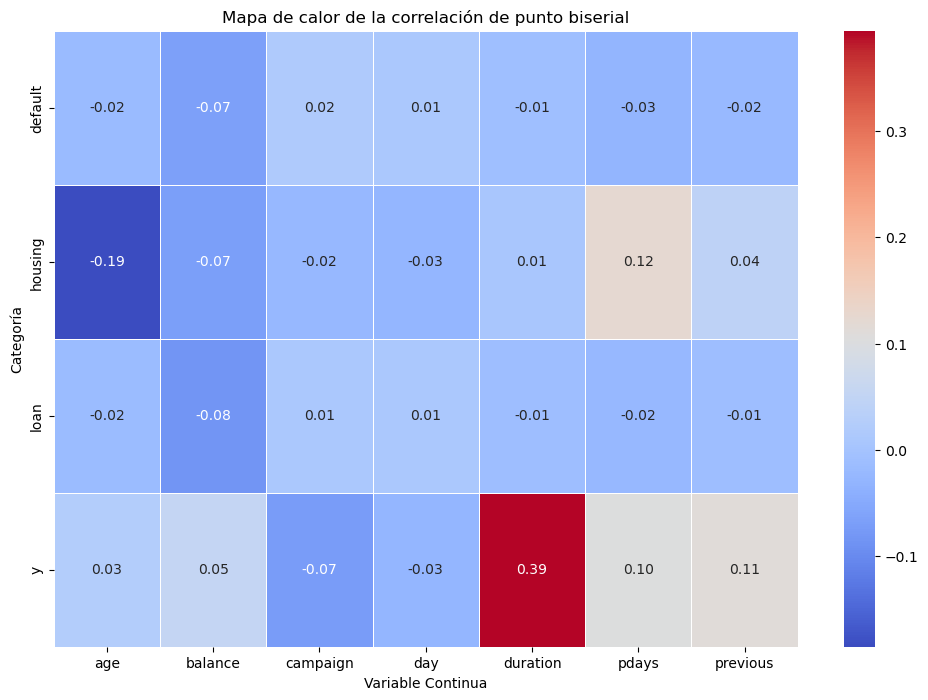

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

# Seleccionar columnas numéricas y categóricas binarias
numerical_cols = df.select_dtypes(include=['int32', 'int16', 'int8', 'float32', 'float64']).columns
binary_cols = ['default', 'housing', 'loan', 'y']

# Crear una lista para almacenar las correlaciones de punto biserial
corr_values = []

# Calcular el coeficiente de correlación de punto biserial
for binary_col in binary_cols:
    for num_col in numerical_cols:
        # Calcular la correlación de punto biserial
        corr, _ = pointbiserialr(df[binary_col].apply(lambda x: 1 if x == 'yes' else 0), df[num_col])
        # Guardar el resultado en la lista
        corr_values.append((binary_col, num_col, corr))

# Crear un DataFrame con los resultados
corr_df = pd.DataFrame(corr_values, columns=["Categoría", "Variable Continua", "Correlación"])

# Pivotear el DataFrame para crear una matriz de correlación
corr_matrix = corr_df.pivot(index="Categoría", columns="Variable Continua", values="Correlación")

# Mostrar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de la correlación de punto biserial")
plt.show()


age          487
balance     4729
day            0
duration    3235
campaign    3064
pdays       8257
previous    8257
dtype: int64
Antes de tratar los valores atípicos: 45211 filas.
Después de eliminar valores atípicos: 28193 filas.
Después de sustituir por la mediana: 45211 filas.


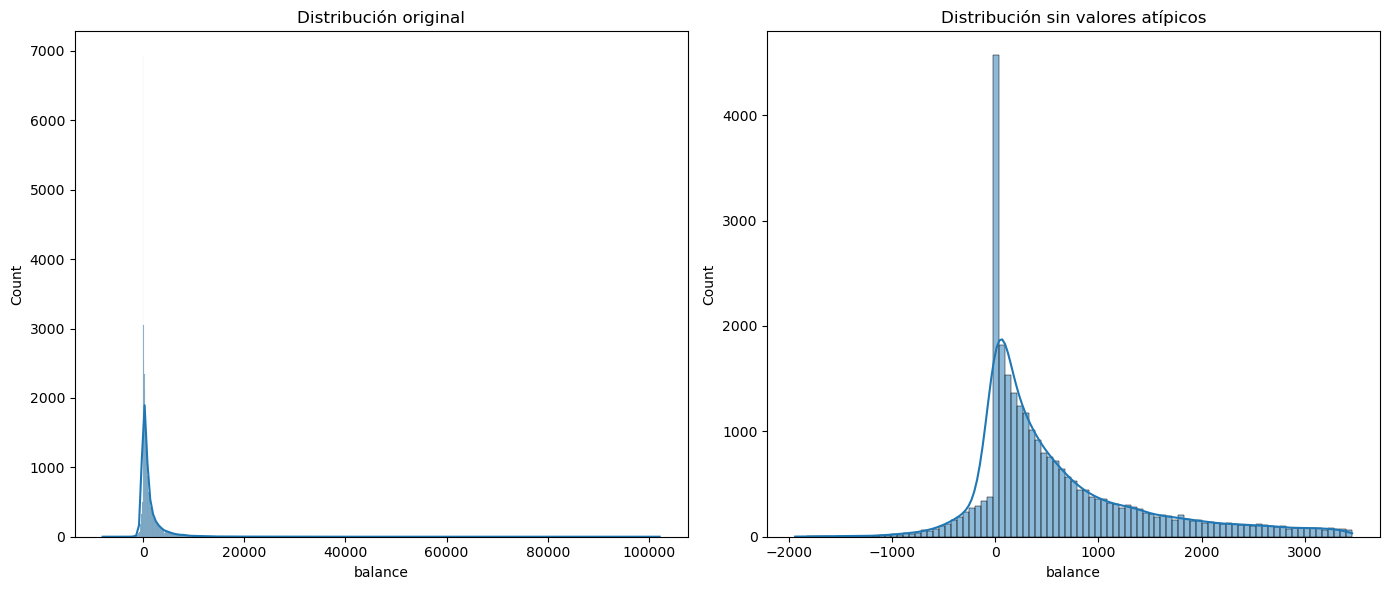

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Vamos a trabajar con las columnas numéricas
numerical_cols = df.select_dtypes(include=['int32', 'int16', 'int8', 'float32', 'float64']).columns

# 1. Identificación de valores atípicos usando el rango intercuartílico (IQR)
def identify_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Identificar valores atípicos en todas las columnas numéricas
outliers = df[numerical_cols].apply(identify_outliers_iqr)

# Visualizar la cantidad de valores atípicos por columna
outliers_count = outliers.sum()
print(outliers_count)

# 2. Tratamiento de valores atípicos
# Opciones: eliminar los valores atípicos o sustituirlos por la mediana de cada columna

# Opción 1: Eliminar los valores atípicos
df_no_outliers = df[~outliers.any(axis=1)]  # Filtrar las filas que tienen al menos un valor atípico

# Opción 2: Sustituir los valores atípicos por la mediana
df_no_outliers_median = df.copy()
for col in numerical_cols:
    median = df[col].median()
    df_no_outliers_median[col] = np.where(outliers[col], median, df[col])

# Mostrar los resultados
print(f'Antes de tratar los valores atípicos: {df.shape[0]} filas.')
print(f'Después de eliminar valores atípicos: {df_no_outliers.shape[0]} filas.')
print(f'Después de sustituir por la mediana: {df_no_outliers_median.shape[0]} filas.')

# 3. Visualizar los resultados
# Histograma antes y después de eliminar o tratar los valores atípicos
plt.figure(figsize=(14, 6))

# Histograma original
plt.subplot(1, 2, 1)
sns.histplot(df['balance'], kde=True)
plt.title('Distribución original')

# Histograma después de eliminar los valores atípicos
plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers['balance'], kde=True)
plt.title('Distribución sin valores atípicos')

plt.tight_layout()
plt.show()
